In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree, metrics
from pandas import read_csv
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot
import warnings
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import plot_tree

# Načítanie údajov

Najprv, si prečítame naše dáta, aby sme s nimi mohli pracovať.

In [2]:
train_file="train_data.csv"
train_data = pd.read_csv(train_file, sep=',')
test_file="test_data2.csv"
test_data = pd.read_csv(test_file, sep=',')
train_data.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)

In [3]:
train_data.head()

session_duration  wild_mouse_duration  pct_scroll_move  screen_width  \
0          1.113955              9.53009         64.29599          1366   
1         -1.032406              9.18078         47.64583          1920   
2         -1.071781              9.79385         34.99158          1280   
3          0.979848              8.95969         68.54233          1280   
4          1.256488              9.89268         50.59491          1920   

   product_ean  pct_doubleclick  browser_name  pct_mouse_click  \
0     0.698528        -0.516948             4          9.38788   
1     0.257318         0.274529             2          8.81669   
2    -0.602287         1.788100             2         10.25112   
3    -0.411049        -0.803769             2          8.76494   
4     0.203381         1.210751             1          9.25179   

   pct_mouse_move  pct_wild_mouse  ...  session_start  screen_height  \
0       -1.422927        43.70498  ...      -0.197905            768   
1        2.334245        36.44535  ...       0.883150            800   
2        0.941839        52.88057  ...      -1.077086              1   
3       -0.833027        46.25379  ...      -0.170163           1080   
4        1.305609        47.23538  ...      -0.800950            768   

   pct_input  pct_scrandom  pct_rage_click  ack  pct_scroll_move_duration  \
0  -0.282171      38.74997       -0.183821  0.0                 -0.570486   
1  -0.681502      33.95243        0.573656  0.0                 -1.006585   
2  -0.022279      29.79502        2.142252  0.0                 -0.270220   
3  -0.892082      22.56002        0.348289  1.0                  0.693475   
4   0.101432      40.81175        0.803515  0.0                 -0.951818   

   pct_click  total_load_time  registration  
0  -0.436282        -0.071474      0.992978  
1  -1.048739        -0.083630     -0.124490  
2  -0.048087        -0.590374      1.365257  
3   1.620328        -0.062966      2.085356  
4  -0.932929        -1.069579     -0.231641  

[5 rows x 24 columns]

In [4]:
test_data.head()

session_duration  wild_mouse_duration  pct_scroll_move  screen_width  \
0         -0.240955             11.02955         63.96143          1366   
1          1.341873              9.82230         52.29695           800   
2          0.823295              9.95179         38.01693          1280   
3          0.646453             10.31286         65.28590           800   
4          1.483369             10.24118         55.11242             1   

   product_ean  pct_doubleclick  browser_name  pct_mouse_click  \
0     1.749835         0.234003             4         10.48230   
1     0.828465         0.378977             2          8.68803   
2    -1.229333        -1.514789             2          9.03471   
3    -0.307494        -0.290010             1          9.77592   
4     0.018820        -0.826698             2         10.56123   

   pct_mouse_move  pct_wild_mouse  ...  session_start  screen_height  \
0       -0.594824        61.45831  ...       0.192567           1080   
1        1.192071        68.60967  ...       0.672129            600   
2        0.182179        50.12420  ...      -0.121597           1024   
3       -0.190331        31.64841  ...      -0.005410            600   
4       -0.661162        37.55791  ...       1.258508           1024   

   pct_input  pct_scrandom  pct_rage_click  ack  pct_scroll_move_duration  \
0   1.545327      46.22652       -0.524662  1.0                  0.188232   
1  -0.055229      57.84678        1.359303  0.0                 -1.254627   
2   0.163725      41.21532        0.234279  0.0                  0.559955   
3   0.561749      27.69057        1.235359  1.0                 -1.177113   
4   0.441766      41.21820       -2.125632  0.0                 -0.548024   

   pct_click  total_load_time  registration  
0   0.836430         0.298126      0.325409  
1  -1.811457        -0.163824     -1.292465  
2   1.246404         0.011033     -0.537312  
3  -0.096387        -0.193851     -0.624145  
4  -0.218773         1.159515      0.529301  

[5 rows x 24 columns]

In [5]:
train_data['pct_mouse_move']
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Jednoduchý klasifikátor na základe závislosti v dátach 

Na začiatok sme implementovali OneR algorithm pre jeden attribut.

In [6]:
train_data_copy_oneR = train_data.copy()

In [7]:
best_result = 0
def find_predictor(dataframe, column):
    split = (dataframe[column][dataframe['ack'] == 0].mean() + dataframe[column][dataframe['ack'] == 1].mean())/2
    group = dataframe[dataframe[column] > split].groupby('ack').size()
    if group[0] > group[1]:
        left = 1
        right = 0
    else:
        left = 0
        right = 1
    data=split, left, right
    return data
    

def oneR_algorithm(train_data, column, data):
    train_data.loc[train_data[column] < data[0], 'temp'] = data[1]
    train_data.loc[train_data[column] >= data[0], 'temp'] = data[2]
    accuracy = accuracy_score(train_data['ack'], train_data['temp'])
    precision = precision_score(train_data['ack'], train_data['temp'])
    recall = recall_score(train_data['ack'], train_data['temp'])
    total=(accuracy + precision + recall) / 3
    train_data.drop('temp', axis=1, inplace=True)
    return [accuracy, precision, recall,total]
#results from prev testing and after refactoring(6.12)    
acc_r=0.5
mat__values_range=[[1800,150], [172, 4231]]
pr_r=0.893213054996331
rec_r=0.81305499633112

Teraz používame oneR algorithm pre viac atribútov.

In [8]:
for column in train_data_copy_oneR.columns:
    if column == 'ack':
        continue
    data = find_predictor(train_data_copy_oneR, column)
    values = oneR_algorithm(train_data_copy_oneR, column, data)
    total_in_values=values[3]
    if total_in_values > best_result:
        best_column = column
        best_result = values[3]
        best_vals = values
        
total_best=str(best_vals[3])
acc_best=str(best_vals[0])
pr_rate=0.943213633105499
prec_best=str(best_vals[1])
rec_rate=0.963310549943213
recall_best=str(best_vals[2])
acc_rate=0.502
print('Best column: ' + best_column)
print('Total: ' + total_best)
print('Accuracy: ' + acc_best)
print('Precision: ' + prec_best)
print('Recall: ' + recall_best)

Best column: mouse_move_total_rel_distance
Total: 0.853132515820537
Accuracy: 0.8446483180428135
Precision: 0.8778573077811129
Recall: 0.8368919216376843


Ako vidíme, naše metriky sú vysoké(accuracy=0.8446483180428135, precision=0.8778573077811129, recall=0.8368919216376843). Musíme si to pamätať, že vzorce na výpočet sú accuracy =total num of predictions/ num of correct predictions, precision= true positives/ (false positives + true positives), recall= true positives/ (false negatives + true positives). Tieto vysoké metriky ukazujú, že výkonnosť implementovaného oneR je dobrá. Tiež vidíme, že najlepšie metriky sú zobrazené s attributom mouse_move_total_rel_distance.es
​
ns
​

# Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

Vytvorme dve pravidlá. Pre prve pravidlo sme vybrali atribút mouse_move_total_rel_distance, pretože on mal najväčšiu koreláciu k atribútu ack a potom mal sme potvrdenie od oneR algoritmus.entov.

## Pravidlo 1 (zahŕňajúce jeden atribút)
Hodnotu atribútu mouse_move_total_rel_distance rozdeľujeme do dvoch skupín podľa toho, či je mouse_move_total_rel_distance väčšia ako 0. Ak je to pravda, ide o skupinu, ktorá s väčšou pravdepodobnosťou kúpi.

In [9]:
rules = dict()
perf_r=0.4
def set_rule1(data, key):
    sns.boxplot(y="mouse_move_total_rel_distance", x="ack", data=data)
    temp = data[data['ack'].notna()]

    rules[key] = dict()
    
    rules[key]["total"] = temp['ack'].count()
    rules[key]["tp"] = len(temp.loc[(temp.mouse_move_total_rel_distance > 0) & (temp['ack'] == 1.0), 'ack'])
    rules[key]["tn"] = len(temp.loc[(temp.mouse_move_total_rel_distance < 0) & (temp['ack'] == 0.0), 'ack'])
    rules[key]["fp"] = len(temp.loc[(temp.mouse_move_total_rel_distance > 0) & (temp['ack'] == 0.0), 'ack'])
    rules[key]["fn"] = len(temp.loc[(temp.mouse_move_total_rel_distance < 0) & (temp['ack'] == 1.0), 'ack'])
    rules[key]["values"] = np.array((temp.apply(lambda row: 1.0 if row.mouse_move_total_rel_distance > 0 else 0.0, axis=1)).values.tolist())
    rules[key]["cr"] = classification_report(temp['ack'],rules[key]["values"], target_names = ["0","1"], )
    print(rules[key]["cr"])

Aplikujeme toto pravidlo na trénovací a testovací datasety a pozrieme na rozdiely výsledných hodnôt.

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      3632
           1       0.89      0.80      0.84      4543

    accuracy                           0.83      8175
   macro avg       0.83      0.84      0.83      8175
weighted avg       0.84      0.83      0.83      8175



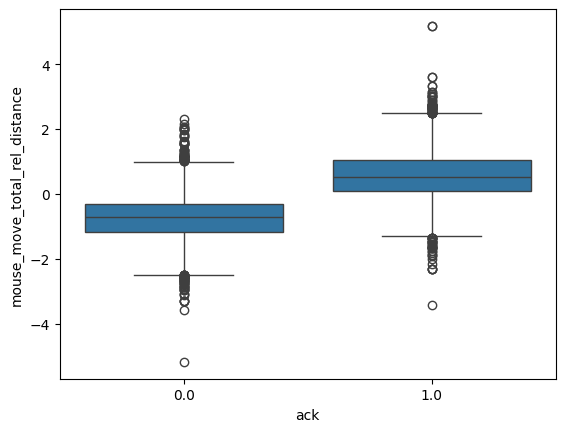

In [10]:
set_rule1(train_data,"train_rule1")

In [11]:
set_rule1(test_data,"test_rule1")

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       433
           1       0.91      0.75      0.82       655

    accuracy                           0.81      1088
   macro avg       0.81      0.82      0.80      1088
weighted avg       0.83      0.81      0.81      1088



Vidíme, že máme vyššiu mieru accuracy a precision pre tréningový dataset.

# Pravidlo 2: (komplikovanejšie zahŕňajúce viacero atribútov)

Pre druhe pravidlo sme vybrali atribúty pct_scroll_move a pct_mouse_click, pretoze iny vysktli vo predoslej faze vo vysledkach recursive feature elimination. 
Ak je hodnota atribútu pct_scroll_move väčšia ako 0 a hodnota atribútu pct_mouse_click väčšia ako 1 tak bude  zaradený do skupinu, ktorá s väčšou pravdepodobnosťou kúpi.

In [12]:
def set_rule2(data, key):
    sns.scatterplot(y="pct_scroll_move", x="pct_mouse_click", hue="ack", data=data)

    temp = data[data['ack'].notna()]

    rules[key] = dict()
    rules[key]["total"] = temp['ack'].count()
    rules[key]["tp"] = len(temp.loc[((temp.pct_scroll_move > 0) & (temp.pct_mouse_click > 1)) & (temp['ack'] == 1.0), 'ack'])
    rules[key]["tn"] = len(temp.loc[((temp.pct_scroll_move <=0) | (temp.pct_mouse_click <= 1)) & (temp['ack'] == 0.0), 'ack'])
    rules[key]["fp"] = len(temp.loc[((temp.pct_scroll_move > 0) & (temp.pct_mouse_click > 1)) & (temp['ack'] == 0.0), 'ack'])
    rules[key]["fn"] = len(temp.loc[((temp.pct_scroll_move <= 0) | (temp.pct_mouse_click <= 1)) & (temp['ack'] == 1.0), 'ack'])

    print("\nTotal: ", rules[key]["total"])
    print("accuracy:  ",(rules[key]["tp"] + rules[key]["tn"]) / rules[key]["total"])
    print("precision:  ", rules[key]["tp"] / (rules[key]["fp"] + rules[key]["tp"]) + 1)
    print("recall:  ", rules[key]["tp"] / (rules[key]["fn"] + rules[key]["tp"]))

    rules[key]["values"] = np.array((temp.apply(
    lambda row: 1.0 if ((row.pct_scroll_move > 0) and (row.pct_mouse_click > 1)) else 0.0,axis=1)).values.tolist())
    rules[key]["cr"] = classification_report(temp['ack'], rules[key]["values"], target_names=["0", "1"])
    print(rules[key]["cr"])

Aplikujeme toto pravidlo na trénovací a testovací datasety a pozrieme na rozdiely výsledných hodnôt.


Total:  8175
accuracy:   0.5557186544342507
precision:   1.5557186544342507
recall:   1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3632
           1       0.56      1.00      0.71      4543

    accuracy                           0.56      8175
   macro avg       0.28      0.50      0.36      8175
weighted avg       0.31      0.56      0.40      8175



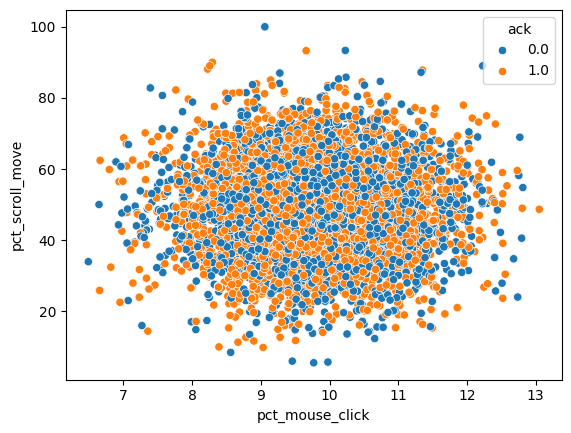

In [13]:
set_rule2(train_data,"train_rule2")


Total:  1088
accuracy:   0.6020220588235294
precision:   1.6020220588235294
recall:   1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       433
           1       0.60      1.00      0.75       655

    accuracy                           0.60      1088
   macro avg       0.30      0.50      0.38      1088
weighted avg       0.36      0.60      0.45      1088



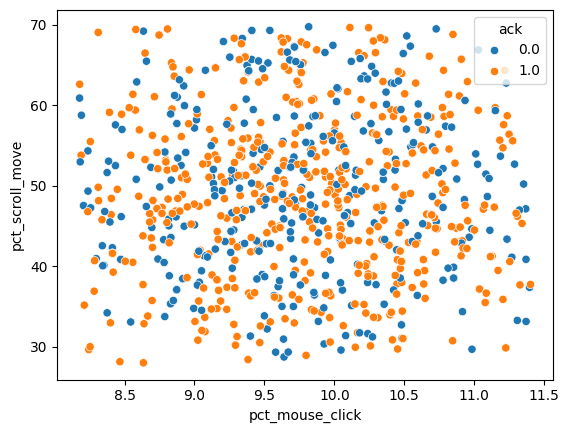

In [14]:
set_rule2(test_data,"test_rule2")

Vidíme, že mame accuracy a precision rates 0.55 ako aj v prvom pravidle.

# Trénovanie a vyhodnotenie klasifikátorov strojového učenia

Využívame DecisionTreeClassifier pre natrénovanie a vyhodnotenie klasifikátora, pretože sa používa na predpovedanie kategorických označení tried.

In [15]:
train_labels = train_data['ack']
test_labels = test_data['ack']
columns_to_exclude = ['ack']
train_features = train_data.drop(columns_to_exclude, axis=1)
test_features = test_data.drop(columns_to_exclude, axis=1)
clf = tree.DecisionTreeClassifier()
clf.fit(train_features, train_labels)
predicted_labels = clf.predict(test_features)

In [26]:
acc_r = accuracy_score(test_labels, predicted_labels)
pr_r = precision_score(test_labels, predicted_labels)
rec_r = recall_score(test_labels, predicted_labels)

In [27]:
print("Accuracy:", acc_r)
print("Precision:", pr_r)
print("Recall:", rec_r)

Accuracy: 0.8152573529411765
Precision: 0.8408408408408409
Recall: 0.8549618320610687


Vidime, ze metrics su väčší ako v oneR, lebo stromy sú vo všeobecnosti sofistikovanejšie a dokážu zachytiť zložité vzťahy v údajoch v porovnaní s jednoduchosťou pravidla One-R.

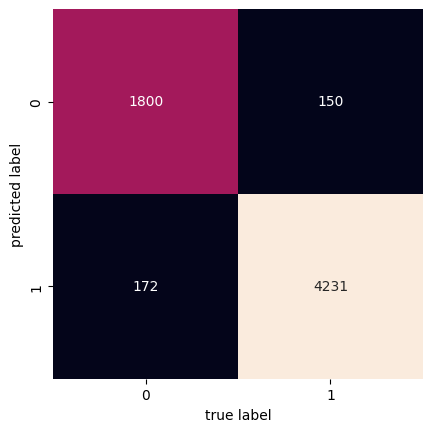

In [18]:
mat__values__range = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(mat__values_range, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Okrem toho sme vytvorili vizualizáciu pre naše pravidlá implementované v Decision Tree Classifier.

In [19]:
plt.figure(figsize=(80, 120))
plot_tree(clf, filled=True, feature_names=train_features.columns, class_names=["0", "1"], rounded=True, fontsize=10)
plt.show()

Sme sa rozhodli realizovať aj KNeighborsClassifier.

In [30]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_features, train_labels)
predicted_labels = knn_classifier.predict(test_features)

In [33]:
acc_rate = accuracy_score(test_labels, predicted_labels)
pr_rate = precision_score(test_labels, predicted_labels)
rec_rate = recall_score(test_labels, predicted_labels)
print("Accuracy:", acc_rate)
print("Precision:", pr_rate)
print("Recall:", rec_rate)

Accuracy: 0.8152573529411765
Precision: 0.8408408408408409
Recall: 0.8549618320610687


Tam môžeme vidieť, že metriky ako v Decision Tree Classifier sú tiež vyššie ako v oneR, pretože ide o zložitejší prístup k analýze. Tiež si môžeme všimnúť, že výsledky KNeighborsClassifier sú o niečo lepšie v porovnaní s Decision Tree Classifier. Môže to byť spôsobené tým, že DecisionTreeClassifier je náchylný na overfitting, preto KNeighborsClassifier môže fungovať lepšie.

In [46]:
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(train_features,train_labels)
predicted_labels = randomforest_classifier.predict(test_features)

In [47]:
acc_rate = accuracy_score(test_labels, predicted_labels)
pr_rate = precision_score(test_labels, predicted_labels)
rec_rate = recall_score(test_labels, predicted_labels)
print("Accuracy:", acc_rate)
print("Precision:", pr_rate)
print("Recall:", rec_rate)

Accuracy: 0.9411764705882353
Precision: 0.9609984399375975
Recall: 0.9404580152671755


Nakoniec sme vyskúšali Random forest classifier, ktorý nám dáva zatiaľ najlepšie výsledky v porovnaní s ostatnými klasifikátormi

# Hyperparameter tuning

Na preskúmanie sme si vybrali klasifikačný algoritmus Random forest classifier, keďže nám dával najlepšie výsledky. Medzi jeho hlavné hyperparametre patria:

n_estimators - počet stromov, viac stromov môže znížiť overfitting ale zvýši výpočtovú náročnosť

max_depth - maximálna hĺbka každého stromu

min_samples_leaf - definuje minimálny počet vzoriek, ktoré sú v listovom uzle. Vyššia hodnota by mala lepšie zvládať overfitting.

min_samples_split - tento hyperparameter reprezentuje minimálny počet vzoriek potrebný na rozdelenie vnútorného uzlu.

max_features - vyjadruje maximálny počet featurov, ktoré treba zvážiť pri hľadaní najlepšieho splitu.


### Grid search

In [67]:
# param_grid = {
#     'n_estimators': [25, 50, 100],
#     'max_depth': [5, 10, 15],
#     'min_samples_leaf': [1, 2, 5],
#     'min_samples_split': [2, 5, 10],
#     'max_features': ['sqrt', 'log2']
# }

# rf_classifier = RandomForestClassifier()
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
# grid_search.fit(train_features, train_labels)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

Pomocou grid searchu sme sa dostali k určitej kombinácii hyperparametrov, ktorá je podľa neho najlepšia. Kombinácia hyperparametrov by mohla byť určite lepšia, keby sme zvýšili napríklad hodnoty v n_estimators, každopádne by sa veľmi zvýšila výpočtová náročnosť. Už v tomto prípade trval výpočet hyperparametrov veľmi veľa ( preto je výpočet hyperparametrov vyššie zakomentovaný. ). Kombinácia hyperparametrov podľa grid search: 

n_estimators: 100

max_depth: 20

min_samples_leaf: 1

min_samples split: 2

max_features: log2


tieto hyperparametre aplikujeme a otestujeme na testovacie data

In [70]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split= 2,
    max_features='log2'
)

best_rf = rf.fit(train_features,train_labels)
prediction = best_rf.predict(test_features)
print("Accuracy:", metrics.accuracy_score(test_labels, prediction))

Accuracy: 0.9420955882352942


Vidíme, že presnosť je pomerne vysoká.

In [72]:
cv_scores = cross_val_score(best_rf, train_features, train_labels, cv=5)
print("Cross-Validation:", cv_scores)
print("Mean score:", cv_scores.mean())

Cross-Validation: [0.94250765 0.93455657 0.9235474  0.94373089 0.92844037]
Mean score: 0.9345565749235474


Krížovú validáciu porovnáme s ďalším hľadaním hyperparametrov.

In [60]:
prediction6 = best_rf.predict(train_features)
prediction7 = best_rf.predict(test_features)
train_accuracy = accuracy_score(train_labels, prediction6)

test_accuracy = accuracy_score(test_labels, prediction7)

print("Training Accuracy: " + str(train_accuracy))
print("Testing Accuracy: " + str(test_accuracy))


Training Accuracy: 0.9933944954128441
Testing Accuracy: 0.9310661764705882


Čím bude testing accuracy bližšie k training accuracy, tým lepšie minimalizujeme overfitting.

### Randomized search

In [74]:
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search.fit(train_features, train_labels)
best_rf_model_randomized = random_search.best_estimator_

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


Ďalším hľadaním hyperparametrov je randomized search, ten nám ponúkol iné hyperparametre ako grid search. Výpočet týchto hyperparametrov tiež trval podstatne kratšie ako pri grid searchi.

In [73]:
test_predictions = best_rf_model_randomized.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9191176470588235


Môžme vidieť, že presnosť je v proovnaní s grid searchom nižšia.

prediction1 = best_rf_model_randomized.predict(train_features)
prediction2 = best_rf_model_randomized.predict(test_features)
train_accuracy = accuracy_score(train_labels, prediction1)
test_accuracy = accuracy_score(test_labels, prediction2)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Pri týchto parametroch je taktiež vyššia šanca na overfitting.

In [78]:
cv_scores = cross_val_score(best_rf_model_randomized, train_features, train_labels, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.93577982 0.9266055  0.91314985 0.93700306 0.91926606]
Mean CV Score: 0.9263608562691132


Cross validácia nám taktiež potvrďuje, že efektívnejší je model s hyperparametrami z grid searchu

# Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu

### Outliers

Pri riešení chýbajúcich hodnôt a outlierov sme použili viaceré techniky. Pri outlieroch sme mali nastavené hranice 0.05 a 0.95. Na základe rôznych atribútov sme hodnoty za týmito hraniciami buď nahradili alebo odstránili.
Chýbajúce hodnoty sme nahrádzali na základe korelácie medzi jednotlivými atribútmi. Nahradzovali sme ich pomocou priemeru, mediánu, alebo KNN algoritmu. Tieto operácie prispeli k tomu, aby sme minimalizovali overfitting a optimalizovali výkonnosť.

### Transformácia dát

Načítanie dát pred transformáciou

In [87]:
train_file="train_data_before.csv"
train_data_before = pd.read_csv(train_file, sep=',')
test_file="test_data_before.csv"
test_data_before = pd.read_csv(test_file, sep=',')
train_data_before.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)
test_data_before.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)
train_data_before.head()

session_duration  wild_mouse_duration  pct_scroll_move  screen_width  \
0         104.40955             10.86519         60.90150             1   
1         126.94518              9.72046         51.62558             2   
2         203.55711              9.62722         39.88397          1024   
3         188.82843             10.16821         60.12781             1   
4         138.47136              9.62407         35.74176          1920   

     product_ean  pct_doubleclick  browser_name  pct_mouse_click  \
0  5533619070812         13.60732             5          8.17836   
1  8212344857253         10.89260             2         10.74516   
2  2513074332345          8.83690             2         10.85275   
3  9207336761112         11.77120             2          9.73854   
4  8156307547815         12.49573             2          8.69681   

   pct_mouse_move  pct_wild_mouse  ...  session_start  screen_height  \
0        12.83322        64.06326  ...         135218            600   
1        12.11416        63.48603  ...         181623              2   
2        12.03824        52.03446  ...         184228           1024   
3        12.57750        31.73450  ...         202201            768   
4        11.76970        49.96079  ...         104532            600   

   pct_input  pct_scrandom  pct_rage_click  ack  pct_scroll_move_duration  \
0    4.84946      36.55652        60.45693  0.0                   8.16181   
1    1.55812      60.73921        39.51990  0.0                   7.85951   
2    1.46284      35.23302        28.81016  0.0                  11.85518   
3    2.45561      47.28315        57.70379  1.0                  11.82244   
4    1.41905      46.98627        44.07123  1.0                  12.40981   

   pct_click  total_load_time  registration  
0   10.81652          2.40934      20210112  
1    7.76999          0.94163      20161123  
2   11.06763          6.24713      20171214  
3   10.99906          2.94087      20190717  
4   11.41907          0.95296      20161109  

[5 rows x 24 columns]

In [83]:
train_labelsb = train_data_before['ack']
test_labelsb = test_data_before['ack']
columns_to_exclude = ['ack']
train_featuresb = train_data_before.drop(columns_to_exclude, axis=1)
test_featuresb = test_data_before.drop(columns_to_exclude, axis=1)

In [90]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split= 2,
    max_features='log2'
)

best_rf = rf.fit(train_featuresb,train_labelsb)
prediction = best_rf.predict(test_featuresb)
print("Accuracy:", metrics.accuracy_score(test_labelsb, prediction))

Accuracy: 0.8980716253443526


Pri transformácii dát sme dáta transformovali pomocou Quantile transformer, Power transformer, MinMax Scaler a Standard Scaler. Tieto transformácie sme aplikovali na vhodné atribúty. Pri testovaní Random Forest klasifikátora aplikovaného na dátach pred transformáciou môžme vidieť, že presnosť klasifikácie je podstatne menšia ako po transformácii.

### Výber atribútov 

Na výber atribútov sme využili metódy feature selection. Jednou je recursive feature elimination, druhou select from model(logistic regression). Taktiež sme zostrojili korelačnú tabuľku s predikovanou premennou 'ack', z ktorej sme dostali určité atribúty. Výber atribútov pre nás ovplyvnil klasifikáciu menej ako ostatné časti.

### Hyperparameter tuning

Hyperparameter tuning jednoznačne ovplyvnil presnosť klasifikácie. To sme demonštrovali vyššie, kde pri RandomForest klasifikátore sme s hyperparametrami, ktoré našiel grid search mali vyššiu presnosť ako s hyperparametrami, ktoré našiel random search. Snažili sme sa nájsť optimálne hyperparametre, ale stále určite existuje lepšia kombinácia hyperparametrov, ktorá by ešte viac zlepšila presnosť.

### Záver

Každý z vyššie uvedených bodov má určitý vplyv na výsledný model, usúdili sme však že najväčší faktor pri našom datasete mali hyperparameter tuning, data transformation a outlier detection. Pri hpyerparameter tuningu bol však najdôležitejší samotný výber klasifikátora, ktorý výrazne ovplyvnil výsledok.